# Text Mining with NLTK

## Python setup

We need the following modules in this notebook:

- nltk
- wordcloud
- pandas
- altair

In [79]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

### Data import

In [102]:
import pandas as pd

# Import some Tweets
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/tweets-cnn.csv")

# drop some columns
df.drop(columns=["author_id", "edit_history_tweet_ids", "id"], inplace=True)

df.head(3)

,text,created_at
0,The body of missing Princeton University stude...,2022-10-20T19:58:17.000Z
1,UK Prime Minister Liz Truss quits after a disa...,2022-10-20T12:37:10.000Z
2,Trump weighs letting federal agents return to ...,2022-10-19T23:03:37.000Z


### Data corrections

In [103]:
df['text'] = df['text'].astype(str).str.lower()

df.head(3)

,text,created_at
0,the body of missing princeton university stude...,2022-10-20T19:58:17.000Z
1,uk prime minister liz truss quits after a disa...,2022-10-20T12:37:10.000Z
2,trump weighs letting federal agents return to ...,2022-10-19T23:03:37.000Z


In [104]:
df['created_at'] = pd.to_datetime(df['created_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        22 non-null     object             
 1   created_at  22 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 480.0+ bytes


## Text mining data preparation

### Tokenization


- We use NLTK's [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) to perform [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) in combination with regular expressions. 

- To learn more about regular expressions ("regexp"), visit the following sites:


- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)


- `\w+` matches Unicode word characters with one or more occurrences; 
- this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [105]:
from nltk.tokenize import RegexpTokenizer

Hint

---

```python

regexp = RegexpTokenizer('___') # use regular expression to match (multiple) word characters and numbers

df['text_token']=df['___'].apply(___.tokenize) # insert the data column and the regular expression pattern

```

---


In [106]:
### BEGIN SOLUTION
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
### END SOLUTION

In [107]:
df.head()

,text,created_at,text_token
0,the body of missing princeton university stude...,2022-10-20 19:58:17+00:00,"[the, body, of, missing, princeton, university..."
1,uk prime minister liz truss quits after a disa...,2022-10-20 12:37:10+00:00,"[uk, prime, minister, liz, truss, quits, after..."
2,trump weighs letting federal agents return to ...,2022-10-19 23:03:37+00:00,"[trump, weighs, letting, federal, agents, retu..."
3,britain's home secretary suella braverman quit...,2022-10-19 16:17:29+00:00,"[britain, s, home, secretary, suella, braverma..."
4,russian president vladimir putin signs a decre...,2022-10-19 12:02:15+00:00,"[russian, president, vladimir, putin, signs, a..."


In [108]:
# Check your code
assert df.iloc[0, 2] == ['the',
 'body',
 'of',
 'missing',
 'princeton',
 'university',
 'student',
 'misrach',
 'ewunetie',
 'has',
 'been',
 'found',
 'https',
 't',
 'co',
 '66wv0od5ut']


*Compare the entries of `text` with `text_token`. Do you notice any differences?*

### Stopwords

- Stop words are words in a stop list which are dropped before analysing natural language data since they don't contain valuable information (like "will", "and", "or", "has", ...).

In [109]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
import nltk
from nltk.corpus import stopwords

In [111]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [114]:
# make your own custom stopwords
my_stopwords = ['https', 'co']

In [115]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

- Next, we use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) (anonymous function) to remove the stopwords:

Hint: 

We want to get rid of all stopwords in `text_token` and create a new column called `text_token_s` (for "text token without stopwords"). 

Therefore, we use the following code:


---

```python
df['text_token_s'] = df['text_token'].___(___ x: [__ for __ in x if __ not in ___])
```


---

You need to complete the code with the follwing information:


- `.apply` applies a function along the rows of the DataFrame.


- `lambda x:` is an anonymous funtion (we dont have to give it a name)


- use `i` as iterator to iterate through every row and only keep words if they are not in `stopwords`.

In [116]:
# BEGIN SOLUTION
df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])
# END SOLUTION

In [121]:
# Check your code
assert df.iloc[1,3] == ['uk',
 'prime',
 'minister',
 'liz',
 'truss',
 'quits',
 'disastrous',
 'six',
 'weeks',
 'office',
 'putting',
 'course',
 'britain',
 'shortest',
 'serving',
 'leader',
 '0o0xqscrxi']

In [122]:
df.head(3)

,text,created_at,text_token,text_token_s
0,the body of missing princeton university stude...,2022-10-20 19:58:17+00:00,"[the, body, of, missing, princeton, university...","[body, missing, princeton, university, student..."
1,uk prime minister liz truss quits after a disa...,2022-10-20 12:37:10+00:00,"[uk, prime, minister, liz, truss, quits, after...","[uk, prime, minister, liz, truss, quits, disas..."
2,trump weighs letting federal agents return to ...,2022-10-19 23:03:37+00:00,"[trump, weighs, letting, federal, agents, retu...","[trump, weighs, letting, federal, agents, retu..."


*Compare the entries of `text_token_s` with `text_token`. Do you notice any differences?*

### Transform data and remove infrequent words

In the next step, we will:

- transform the text tokens to a simple string (i.e. from cell value [a , b , c] to 'a b c') because the following steps (like lemmatization) can't handle tokens


- remove words which occur less then two times (because such infrequent words usually don't have much value for our analysis)


- save the result in a new column called `text_si` (`s` stands for stopword and `i` for infrequent words)



Hint:


---

```python
___ = df['___'].___(lambda x: ' '.join([__ for __ in __ if len(__)>__]))
```


---



- name the new column `text_si`


- use the column `text_token_s`


- use `.apply` to apply a lambda function to every row of the dataframe


- The lambda function should: 

  - combine (use `join()`) all word tokens (use `i` as an iterator) from a row in a single string (use a white space `' '`
 as seperator between the tokens)
  - only keep tokens which occur more than 2 times

In [123]:
### BEGIN SOLUTION
df['text_si'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))
### END SOLUTION

In [126]:
# check you code
assert df.iloc[1, 4] == 'prime minister liz truss quits disastrous six weeks office putting course britain shortest serving leader 0o0xqscrxi'

In [127]:
df.head(3)

,text,created_at,text_token,text_token_s,text_si
0,the body of missing princeton university stude...,2022-10-20 19:58:17+00:00,"[the, body, of, missing, princeton, university...","[body, missing, princeton, university, student...",body missing princeton university student misr...
1,uk prime minister liz truss quits after a disa...,2022-10-20 12:37:10+00:00,"[uk, prime, minister, liz, truss, quits, after...","[uk, prime, minister, liz, truss, quits, disas...",prime minister liz truss quits disastrous six ...
2,trump weighs letting federal agents return to ...,2022-10-19 23:03:37+00:00,"[trump, weighs, letting, federal, agents, retu...","[trump, weighs, letting, federal, agents, retu...",trump weighs letting federal agents return mar...


*Note that this operation changes the format of your cell entries (notice the missing brackets). Do you notice further differences?*


### Lemmatization

- Next, we perform [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) (lemmatization is the process of converting a word to its base form).

In [128]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [129]:
from nltk.stem import WordNetLemmatizer

In [130]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [131]:
# create a new column called text_sil (l for lemmatization) and apply the function .lemmatize
df['text_sil'] = df['text_si'].apply(wordnet_lem.lemmatize)

In [132]:
# we check wether there are any differences in the two columns
check_difference = (df['text_sil'] == df['text_si'])

# sum all True and False values
check_difference.value_counts()

True    22
dtype: int64

*We can observe that on our data, the lemmatization function did not change an of the words (we have only `True` values, which means that every row in `df['text_sil'] == df['text_si']`).*

In [153]:
df.to_csv("sentiment-cnn.csv", index=None)

## Data visualization

### Word cloud

We use a word cloud to visualize our data ([word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery))

In [133]:
# combine all words in one object called all_words
all_words = ' '.join([i for i in df['text_sil']])

In [134]:
all_words

'body missing princeton university student misrach ewunetie found 66wv0od5ut prime minister liz truss quits disastrous six weeks office putting course britain shortest serving leader 0o0xqscrxi trump weighs letting federal agents return mar lago potentially supervised search government seeks ensure docs returned ppjifj2qqq britain home secretary suella braverman quits throwing government embattled prime minister liz truss turmoil xizzmajsao russian president vladimir putin signs decree introducing martial law four ukrainian regions moscow recently claimed annexed i4d4skhrge rising food housing costs drove inflation back year high september rzcvzuvhap jury finds paul flores guilty first degree murder death kristin smart father found guilty accessory murder kiypga2ytv russian expat main source infamous trump dossier acquitted lying fbi embarrassing defeat special counsel durham vu0cacf8zn pilot passenger dead plane crashed car dealership lot near marietta ohio authorities say one ground 

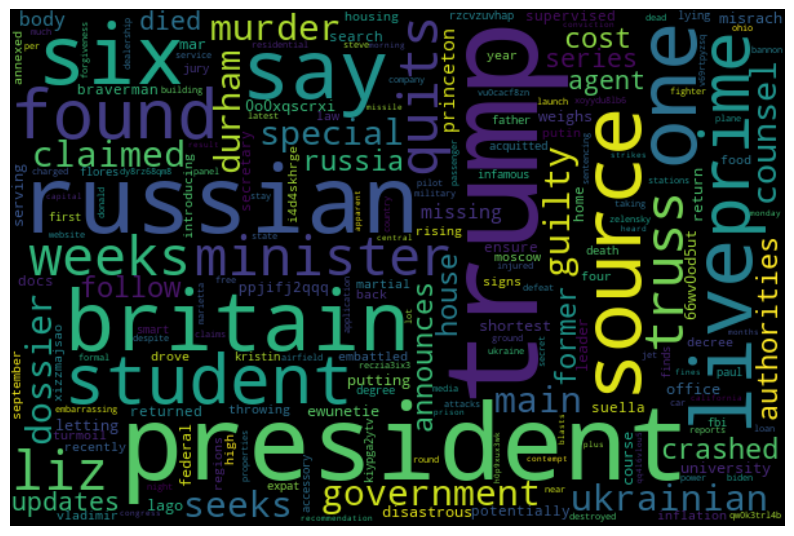

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

- Different style:

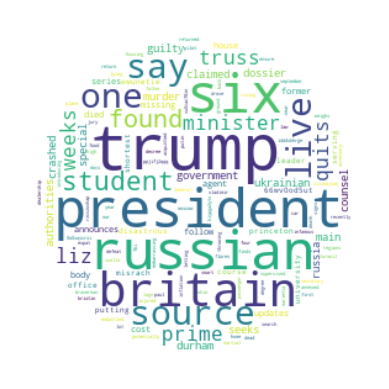

In [136]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [137]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [139]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

In [140]:
# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [141]:
words

['albi_sidearms',
 'maybe',
 'jack',
 'ueyr6nawap',
 'sawyermerritt',
 'sawyermerritt',
 'tesla',
 'china',
 'done',
 'amazing',
 'work',
 'mrbeast',
 'planet4589',
 'earth',
 'called',
 'water',
 'samifouad',
 'tobyliiiiiiiiii',
 'noobtoob',
 'thinking',
 'quitting',
 'jobs',
 'amp',
 'becoming',
 'influencer',
 'full',
 'time',
 'wdyt',
 'zrz1eflywy',
 'teslaownerssv',
 'billym2k',
 'thecryptocpa',
 'ballaerospace',
 'nasa_marshall',
 'nasa',
 'spacex',
 'congrats',
 '_rykllan',
 'spacex',
 'felixschlang',
 'marcushouse',
 'erdayastronaut',
 'bluemoondance74',
 'nexthorizonssf',
 'rocket',
 'fleets',
 'grows',
 'squawkcnbc',
 'gordonjohnson19',
 'rainmaker1973',
 'amazing',
 'engine',
 'cnunezimages',
 'spacex',
 'spaceintellige3',
 'rainmaker1973',
 'shanghai',
 'beautiful',
 'ppathole',
 'probably',
 'way',
 'sooner',
 'hot',
 'civilization',
 'unless',
 'susceptible',
 'extreme',
 'natural',
 'disasters',
 'nuclear',
 'power',
 'plants',
 'shut',
 'watcherguru',
 'taxing',
 'billi

In [142]:
fd

FreqDist({'trump': 5, 'president': 5, 'russian': 4, 'six': 3, 'britain': 3, 'source': 3, 'one': 3, 'student': 2, 'found': 2, 'prime': 2, ...})

### Most common words

Find the 3 most common words by using the function `most_common(n=foo)` (foo is a placeholder).

Use the object `fd` to obtain the result

Save the result as `top_3`



In [143]:
# find the 3 most common words
### BEGIN SOLUTION
top_3 = fd.most_common(n=3)
### END SOLUTION

In [145]:
# Check your code
assert top_3 == [('trump', 5), ('president', 5), ('russian', 4)]

In [146]:
# show the 3 most common words as table
fd.tabulate(3)

    trump president   russian 
        5         5         4 


### Plot common words

In [147]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('trump', 5),
 ('president', 5),
 ('russian', 4),
 ('six', 3),
 ('britain', 3),
 ('source', 3),
 ('one', 3),
 ('student', 2),
 ('found', 2),
 ('prime', 2)]

In [148]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
britain,3
found,2
one,3
president,5
prime,2
russian,4
six,3
source,3
student,2
trump,5


In [149]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,britain,3
1,found,2
2,one,3
3,president,5
4,prime,2
5,russian,4
6,six,3
7,source,3
8,student,2
9,trump,5


In [150]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

### Search specific words

In [152]:
# Show frequency of a specific word
fd["trump"]

5